# Predicting user rating of a book with rmse

Dataset on Amazon's Top 50 bestselling books from 2009 to 2019. Contains 550 books, data has been categorized into fiction and non-fiction using Goodreads

### https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019/tasks

## purpose: Visualizing the data and predict user rating by using Linear Regression and Decision Tree Regressor 

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bestsellers_with_categories.csv')

In [3]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


## Check the information of the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


### No null value in this data.

# Check each column

## Check Name and Author columns

In [5]:
len(df['Name'].unique())

351

In [6]:
len(df['Author'].unique())

248

### There are so many Names and Authors

## Check the distribution of User Rating

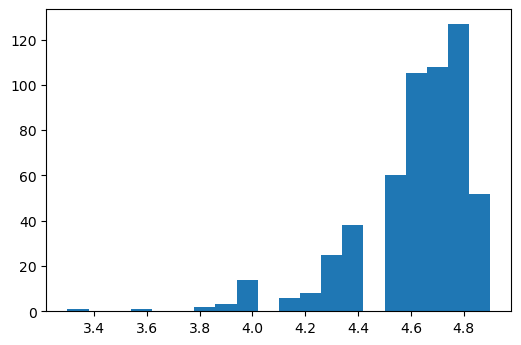

In [7]:
fig = plt.figure(dpi=100)

plt.hist(df['User Rating'], bins=20)

plt.show()

In [8]:
df['User Rating'].min(), df['User Rating'].max()

(3.3, 4.9)

## Check the distribution of Reviews

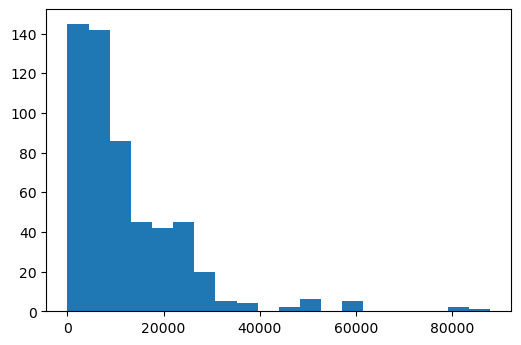

In [9]:
fig = plt.figure(dpi=100)

plt.hist(df['Reviews'], bins=20)

plt.show()

## Check the distribution of Price

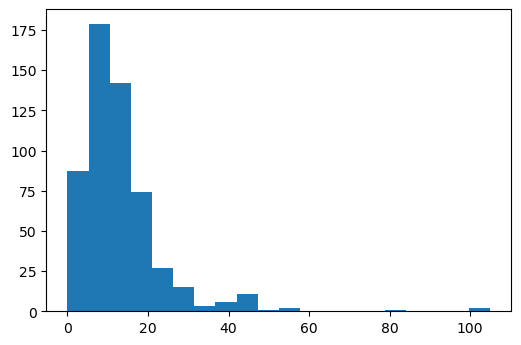

In [10]:
fig = plt.figure(dpi=100)

plt.hist(df['Price'], bins=20)

plt.show()

In [11]:
out_ratio = len(df[df['Price'] > 80]) / len(df) * 100
print(f"{out_ratio:.2f} %")

0.55 %


### It seems that we might be able to remove some values(ex:price of more than $80)

## Chech the distribution of Year

In [12]:
df['Year'].max(),df['Year'].min()

(2019, 2009)

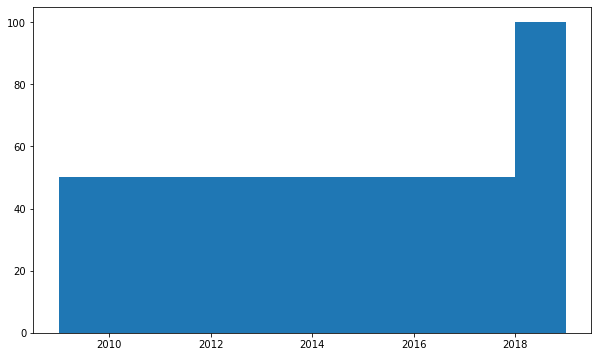

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df['Year'])

plt.show()

In [14]:
len(df[(df['Year'] == 2018 )| (df['Year'] == 2019 )])/len(df)

0.18181818181818182

In [15]:
df['Year'].dtype

dtype('int64')

In [16]:
df['Year'].unique()

array([2016, 2011, 2018, 2017, 2019, 2014, 2010, 2009, 2015, 2013, 2012])

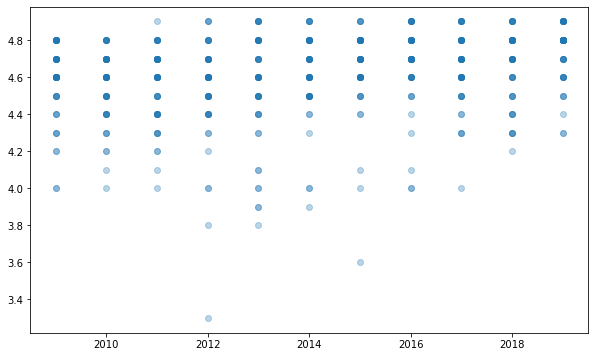

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['Year'], y=df['User Rating'], alpha=0.3)

## Check the Genre

In [18]:
df['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

<AxesSubplot:ylabel='Genre'>

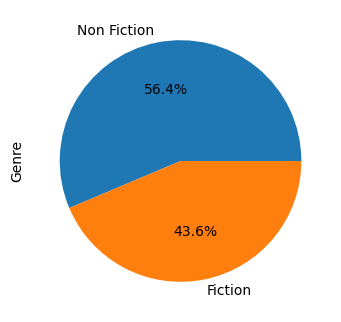

In [19]:
fig = plt.figure(dpi=100)

df['Genre'].value_counts().plot.pie(autopct="%.1f%%")

## Check the Correlation with User Rating(target column)

In [20]:
corr = df.corr()
corr['User Rating']

User Rating    1.000000
Reviews       -0.001729
Price         -0.133086
Year           0.242383
Name: User Rating, dtype: float64

### "Year", "Genre" and "Price" have a strong correlation with "User Rating" and "Reviews" has a relatively week correlation

In [21]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# Create models by using ,"Genre","Price","Reviews","Year" columns
# Use data of year 2018, 2019 as a test set and rest of the data as a train set

In [22]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


## Encoding category data

In [23]:
import category_encoders as ce

list_cols = ['Genre']
ce_one = ce.OneHotEncoder(cols=list_cols)
df = ce_one.fit_transform(df)

df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre_1,Genre_2
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,1,0
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,0,1
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,1,0
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,0,1
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,1,0


In [24]:
import category_encoders as ce

list_cols = ['Name', 'Author']

ce_oe = ce.OrdinalEncoder(cols=list_cols)
df = ce_oe.fit_transform(df)

df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre_1,Genre_2
0,1,1,4.7,17350,8,2016,1,0
1,2,2,4.6,2052,22,2011,0,1
2,3,3,4.7,18979,15,2018,1,0
3,4,4,4.7,21424,6,2017,0,1
4,5,5,4.8,7665,12,2019,1,0


In [25]:
df.sort_values(by='Year', ascending=True, inplace=True)

In [26]:
df_train = df[(df['Year'] != 2018) & (df['Year'] != 2019)]
df_test = df[(df['Year'] == 2018)|(df['Year'] == 2019)]

In [27]:
df_train.shape, df_test.shape

((450, 8), (100, 8))

In [28]:
X_train = df_train.drop(['User Rating'], axis=1)
y_train = df_train['User Rating']
X_test = df_test.drop(['User Rating'], axis=1)
y_test = df_test['User Rating']

In [29]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((450, 7), (450,), (100, 7), (100,))

In [30]:
len(X_train), len(X_test), len(y_train), len(y_test) 

(450, 100, 450, 100)

## Evaluate the data by using LinearRegression

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()

In [32]:
lr.fit(X_train, y_train)

LinearRegression()

## Check the model performance with train_set

In [33]:
lr_mse = mean_squared_error(y_train, lr.predict(X_train))
lr_rmse = np.sqrt(lr_mse)
lr_rmse

0.22416039372905922

## Evaluate the date by using DecisionTreeRegressor

In [34]:
from sklearn.tree import DecisionTreeRegressor

tr = DecisionTreeRegressor()
tr.fit(X_train, y_train)

DecisionTreeRegressor()

In [35]:
tr_mse = mean_squared_error(y_train, tr.predict(X_train))
tr_rmse = np.sqrt(tr_mse)
tr_rmse

2.44136895921186e-16

### It seems that DecisionTreeRegressor is overfitting the data

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

## Evaluate with cross validation

In [37]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tr, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
tr_rmse_scores = np.sqrt(-scores)

In [38]:
def desplay_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

In [39]:
desplay_scores(tr_rmse_scores)

Scores: [0.2577682  0.23045848 0.24899799 0.27039066 0.29664794 0.27243756
 0.12823589 0.2394438  0.17061979 0.15986105]
Mean: 0.22748613608603457
Standard deviation: 0.05275785459985584


In [40]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
lr_rmse_scores = np.sqrt(-scores)

In [41]:
desplay_scores(lr_rmse_scores)

Scores: [0.20273365 0.21015951 0.21686093 0.2774237  0.29287242 0.24449601
 0.19095158 0.22728934 0.215744   0.18694142]
Mean: 0.22654725620311145
Standard deviation: 0.03345445268662598


## Try RandomForestRegressor

In [42]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [43]:
rf_mse = mean_squared_error(y_train, rf.predict(X_train))
rf_rmse = np.sqrt(rf_mse)
rf_rmse

0.0637126709881516

In [44]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
rf_rmse_scores = np.sqrt(-scores)

In [45]:
desplay_scores(rf_rmse_scores)

Scores: [0.18003605 0.19384197 0.16299339 0.2268149  0.21439128 0.18950643
 0.15712918 0.18601493 0.16440891 0.13258716]
Mean: 0.18077242073624658
Standard deviation: 0.026438496995472353
